# What makes difference between a job title - DA / DS

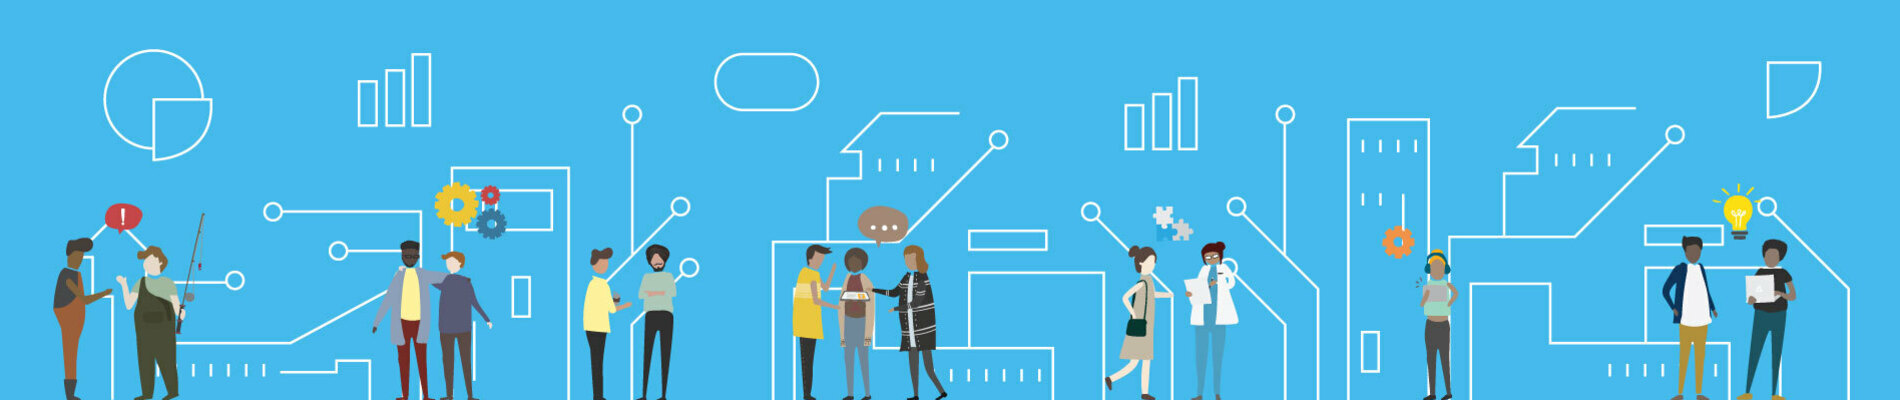

# 0. Introduction 
### Coding and Data Analysis

These are the most trending words around a world and it has taken over the country. 
 
Many education-tech companies in Korea have started launching data-related courses and programs and this trend is still ongoing. Our team is also one of them who have a different background and are actively seeking a data-related job. However, it is pretty hard to decide which job title or role would fit due to unsettled definitions or roles among Data Scientist (DS), Data Anaylst(DA), and Data Engineer(DE) across industries.

As a job seeker, the team would like to see the exact role or necessary skills to be one of them (DS, DA, DE, etc.).

This notebook will focus on questions that job seekers or beginners like us would be curious about data-related industry and we hope to gain much clearer comprehensive veiw of state of data-related jobs to be prepared.


Let's dive into the survey!

# Libraries

In [509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(font_scale = 2.5) # 폰트 크기 세팅

import squarify                   # 트리맵 그리기
plt.style.use('fivethirtyeight')
from pywaffle import Waffle

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# plotly 불러오기
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

# 1. Import Dataset

In [510]:
response = pd.read_csv('kaggle_survey_2021_responses.csv', encoding = 'ISO-8859-1')
response.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelorâs degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Masterâs degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Masterâs degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [511]:
# Save Questions as a list and fill missing values into ''
question_list = response.iloc[0,].values
response = response.iloc[1:,:].reset_index(drop = True)
response.fillna('', inplace = True)
response.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,910,50-54,Man,India,Bachelorâs degree,Other,5-10 years,Python,R,,...,,,,,,,,,,
1,784,50-54,Man,Indonesia,Masterâs degree,Program/Project Manager,20+ years,,,SQL,...,,,,,,,,,None,
2,924,22-24,Man,Pakistan,Masterâs degree,Software Engineer,1-3 years,Python,,,...,,,TensorBoard,,,,,,,
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,,,...,,,,,,,,,None,
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,,,...,,,,,,,,,,


# 2. Feature Engineering and Data Wrangling

## 2.1 Combining all relevant features
   
At the first glance, the team recognize that some features come from a single multiple-choice question. Thus, we decide to combine all relavent features into one feature.


In [512]:
def total_answer(df, column):
    """
    A function to combine all relevant features coming from a multiple-choice question
    column : column name
    """ 
    # Extract all relevant columns corresponding to 'column'
    col = df.columns[df.columns.str.contains(column)]
    tmp = df[col]
    # Fill missing values with empty space ''
    tmp = tmp.fillna('')
    
    # Add comma(,) between answers
    total = tmp.apply(','.join, axis=1)

    # Remove unnecessary comma(,)
    import re
    ls = []
    for i in total:
        ls.append(re.sub(',{2,}', ',', i).strip(',')) ## 콤마가 2개 이상인 경우 하나로 바꾸기

    # Delete the rest of columns that are already used
    df.drop(col, axis=1, inplace=True)

    # Store the combined answers into a column
    df[column] = ls


In [513]:
# Apply total_answer() to only multiple-type questions

q_list_supplementary = [27,29,30,31,32,34,36,37,38] # supplementary question list

for i in range(7, 43):
    if i in q_list_supplementary:
        num_A = 'Q' + str(i) + '_A'
        num_B = 'Q' + str(i) + '_B'
        total_answer(response ,num_A)
        total_answer(response ,num_B)
    
    else:
        num = 'Q'+str(i)
        total_answer(response ,num)
response.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q36_A,Q36_B,Q37_A,Q37_B,Q38_A,Q38_B,Q39,Q40,Q41,Q42
0,910,50-54,Man,India,Bachelorâs degree,Other,5-10 years,"Python,R",Python,Vim / Emacs,...,No / None,,,,No / None,,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...","Local development environments (RStudio, Jupyt...","Email newsletters (Data Elixir, O'Reilly Data ..."
1,784,50-54,Man,Indonesia,Masterâs degree,Program/Project Manager,20+ years,"SQL,C,C++,Java",Python,"Notepad++ , Jupyter Notebook",...,,"Automated model selection (e.g. auto-sklearn, ...",,Google Cloud AutoML,,None,,"Kaggle Learn Courses,Cloud-certification progr...","Advanced statistical software (SPSS, SAS, etc.)","Journal Publications (peer-reviewed journals, ..."
2,924,22-24,Man,Pakistan,Masterâs degree,Software Engineer,1-3 years,"Python,C++,Java",Python,"PyCharm , Jupyter Notebook,Other",...,No / None,"Automated model selection (e.g. auto-sklearn, ...",,DataRobot AutoML,No / None,TensorBoard,I do not share my work publicly,DataCamp,"Basic statistical software (Microsoft Excel, G...","Kaggle (notebooks, forums, etc),YouTube (Kaggl..."
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Python,"Spyder , Jupyter Notebook",...,,None,,,,None,,"Coursera,edX","Local development environments (RStudio, Jupyt...","YouTube (Kaggle YouTube, Cloud AI Adventures, ..."
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,"Python,C,MATLAB",Python,"Spyder , MATLAB , Jupyter Notebook",...,No / None,,,,Weights & Biases,,I do not share my work publicly,"Kaggle Learn Courses,Udemy","Local development environments (RStudio, Jupyt...","Journal Publications (peer-reviewed journals, ..."


## 2.2 Regrouping Job Title: 
### DA (Data Analysist) vs DE (Data Engineering) vs DS (Data Scientist) vs Other

Among 15 different jop titles in survey, the team regroup them into four typical jobs DA, DE, DS and others to help out those who are interested in data-related job but have no idea which one would fit for themseleves

Here is how we regroup:

|Group | List of Job Title|
|:--|:--|
|DA (Data Analysist) | 'Business Analyst', 'Data Analyst', 'Product Manager', 'Program/Project Manager', 'Statistician'
| DE (Data Engineering) | 'Data Engineer', 'DBA/Database Engineer', 'Machine Learning Engineer', 'Software Engineer', 'Developer Relations/Advocacy'
|DS (Data Scientist) | 'Data Scientist', 'Research Scientist'
|Other |'Student', 'Currently not employed', 'Other'

In [514]:
response['RegroupJobTitle'] = response['Q5'].copy()
response['RegroupJobTitle'] = response['RegroupJobTitle'].replace(['Business Analyst', 'Data Analyst', 'Product Manager', 'Program/Project Manager', 'Statistician'],'DA')
response['RegroupJobTitle'] = response['RegroupJobTitle'].replace(['Data Engineer', 'DBA/Database Engineer', 'Machine Learning Engineer', 'Software Engineer', 'Developer Relations/Advocacy'], 'DE')
response['RegroupJobTitle'] = response['RegroupJobTitle'].replace(['Data Scientist', 'Research Scientist'], 'DS')
response['RegroupJobTitle'] = response['RegroupJobTitle'].replace(['Student', 'Currently not employed', 'Other'], 'OTHER')

In [515]:
response['RegroupJobTitle'].value_counts(normalize = True)

OTHER    0.430563
DS       0.198437
DE       0.188118
DA       0.182882
Name: RegroupJobTitle, dtype: float64

## 2.3 Professionals Vs Non-professionals

By definition of "Non-professionals" in '2021 Kaggle DS & ML Survey Final List of Questions' file,

*Non-professionals* were defined as students, unemployed, and respondents that have
never spent any money in the cloud.

All supplement questions for non-professionals asked **what tools they hope to become familiar with in the next 2 years** instead of asking what tools they use on a regular basis.

In [516]:
cond = ((response['Q27_B'] != '') | (response['Q29_B'] != '') | (response['Q30_B'] != '') | 
        (response['Q31_B'] != '') | (response['Q32_B'] != '') | (response['Q34_B'] != '') | 
        (response['Q36_B'] != '') | (response['Q37_B'] != '') | (response['Q38_B'] != ''))

response['professional'] = 'Professional'
response.loc[cond, 'professional'] = 'Non-professional'

In [517]:
response['professional'].value_counts(normalize = True)

Non-professional    0.51954
Professional        0.48046
Name: professional, dtype: float64

## 2.4 Rename Columns

In [518]:
# Rename columns
question_name_dict = {'Q1':'Age', 'Q2': 'Gender', 'Q3':'Country', 'Q4':'FormalEducation',
                      'Q5':'JobTitle','Q6':'YearsToCode', 'Q7':'Language_regular', 'Q8': 'Language_first',
                      'Q9':'IDE', 'Q10':'Notebook', 'Q11':'Computer', 'Q12':'Hardware', 'Q13':'Duration_TPU',
                      'Q14':'Vis_library', 'Q15':'Years_ML_Method','Q16':'ML_framework', 'Q17':'ML_algorithm',
                      'Q18':'Method_CV', 'Q19':'Method_NLP', 'Q20':'JobIndustry', 'Q21':'CompanySize',
                      'Q22':'Num_Workloads', 'Q23':'ML_Applied', 'Q24':'Activities_role', 'Q25':'Year_Compensation',
                      'Q26':'Spent_amount_ML', 'Q27_A':'Cloud_platform_A', 'Q27_B':'Cloud_platform_B', 
                      'Q28':'Best_Cloud_platform','Q29_A':'Use_Cloud_platform_A','Q29_B':'Use_Cloud_platform_B',
                      'Q30_A':'Use_Data_Storage_A','Q30_B':'Use_Data_Storage_B', 'Q31_A':'Use_ML_product_A',
                      'Q31_B':'Use_ML_product_B','Q32_A':'BigData_product_A','Q32_B':'BigData_product_B',
                      'Q33':'Best_BigData_product','Q34_A':'BI_Tool_A','Q34_B':'BI_Tool_B','Q35':'Best_BI_Tool',
                      'Q36_A':'AutoML_Tool_A','Q36_B':'AutoML_Tool_B','Q37_A':'Which_AutoML_Tool_A',
                      'Q37_BB':'Which_AutoML_Tool_B','Q38_A':'ManageML_A','Q38_B':'ManageML_B',
                      'Q39':'PublicToDeploy',
                      'Q40':'PlatformToLear_DS','Q41':'PrimaryTool','Q42':'MediaSourceToLearn'
                     }

response = response.rename(columns = question_name_dict)
response.head()

,Time from Start to Finish (seconds),Age,Gender,Country,FormalEducation,JobTitle,YearsToCode,Language_regular,Language_first,IDE,...,Which_AutoML_Tool_A,Q37_B,ManageML_A,ManageML_B,PublicToDeploy,PlatformToLear_DS,PrimaryTool,MediaSourceToLearn,RegroupJobTitle,professional
0,910,50-54,Man,India,Bachelorâs degree,Other,5-10 years,"Python,R",Python,Vim / Emacs,...,,,No / None,,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...","Local development environments (RStudio, Jupyt...","Email newsletters (Data Elixir, O'Reilly Data ...",OTHER,Professional
1,784,50-54,Man,Indonesia,Masterâs degree,Program/Project Manager,20+ years,"SQL,C,C++,Java",Python,"Notepad++ , Jupyter Notebook",...,,Google Cloud AutoML,,None,,"Kaggle Learn Courses,Cloud-certification progr...","Advanced statistical software (SPSS, SAS, etc.)","Journal Publications (peer-reviewed journals, ...",DA,Non-professional
2,924,22-24,Man,Pakistan,Masterâs degree,Software Engineer,1-3 years,"Python,C++,Java",Python,"PyCharm , Jupyter Notebook,Other",...,,DataRobot AutoML,No / None,TensorBoard,I do not share my work publicly,DataCamp,"Basic statistical software (Microsoft Excel, G...","Kaggle (notebooks, forums, etc),YouTube (Kaggl...",DE,Non-professional
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Python,"Spyder , Jupyter Notebook",...,,,,None,,"Coursera,edX","Local development environments (RStudio, Jupyt...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",DS,Non-professional
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,"Python,C,MATLAB",Python,"Spyder , MATLAB , Jupyter Notebook",...,,,Weights & Biases,,I do not share my work publicly,"Kaggle Learn Courses,Udemy","Local development environments (RStudio, Jupyt...","Journal Publications (peer-reviewed journals, ...",OTHER,Professional


# 3. Questions to answer

## Q1. Age

In [519]:
age.sum().sum()

100.0

In [520]:
100 * pd.crosstab(response['Age'], response['professional']).sum(axis = 1)/total

Age
18-21    18.869595
22-24    18.072614
25-29    18.985100
30-34    13.248373
35-39     9.640781
40-44     7.276787
45-49     5.293959
50-54     3.711547
55-59     2.279290
60-69     2.129134
70+       0.492819
dtype: float64

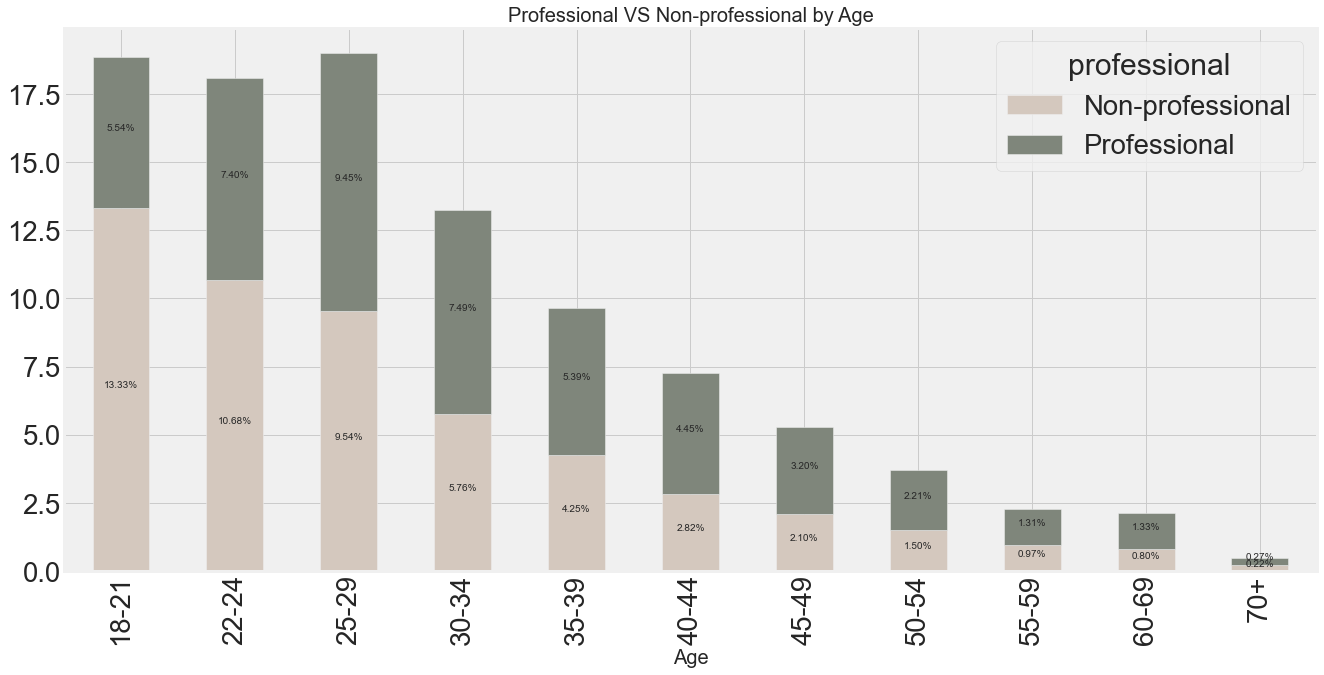

In [521]:
age = 100 * pd.crosstab(response['Age'], response['professional'])/total
total = age.sum().sum()
# barplot
ax_1 = age.plot.bar(stacked = True, color = {'#7F867B', '#D4C8BE'}, figsize = (20,10))

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.2f}%".format(height),
              ha='center', 
              va='bottom') 
plt.xlabel('Age', fontsize = 20)
plt.title('Professional VS Non-professional by Age', fontsize =20)
plt.show()

It is obvious that the most professional respondants are distributed in both 25-29 and 30-34 age group while non-professionals are much younger. 

Let's see how different ages would be distributed by sub-category. (DS,DA, DE, Other)

In [522]:
# Professional vs Non-professional 
cond_pro = (response['professional'] == 'Professional')
pro = response[cond_pro]
nonpro = response[-cond_pro]

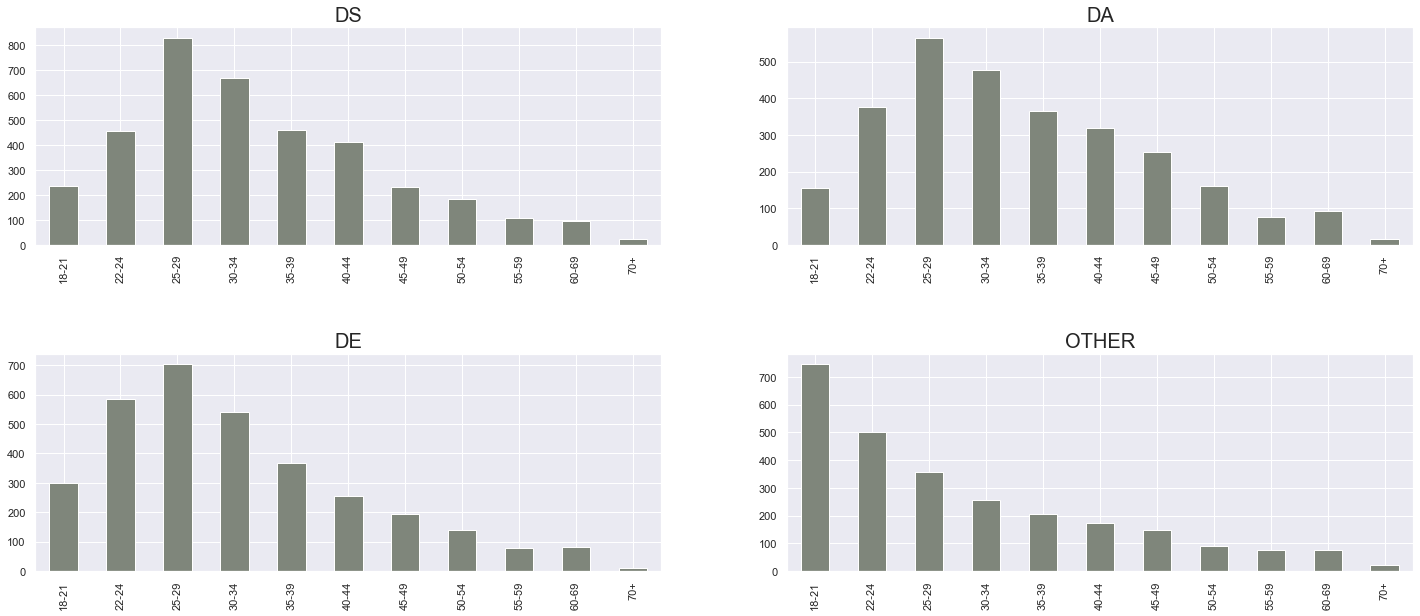

In [523]:
import itertools
plt.subplots(figsize = (22,10))
age_pro = pd.crosstab(pro['Age'], pro['RegroupJobTitle'])
# age_nonpro = pd.crosstab(nonpro['Age'], nonpro['RegroupJobTitle'])
category = ['DS','DA','DE','OTHER']
length = len(category)

sns.set_theme(style="darkgrid")

for i, j in itertools.zip_longest(category, range(length)):
    plt.subplot( (length/2), 2, j+1) # nrows, ncols, index
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

    age_pro[i].plot.bar(color = '#7F867B')
#     age_nonpro[i].plot.bar(color = '#D4C8BE')
    plt.title(i, size = 20)
    plt.xlabel('')
plt.show()

## Q2. Gender

In [524]:
# Group other three gender types as 'others'
other_gender = ['Nonbinary', 'Prefer not to say', 'Prefer to self-describe']
response['Gender'] = response['Gender'].map(lambda x:'Others' if x in other_gender else x)
response['Gender'].value_counts()

# Professional vs Non-professional 
cond_pro = (response['professional'] == 'Professional')
pro = response[cond_pro]
nonpro = response[-cond_pro]

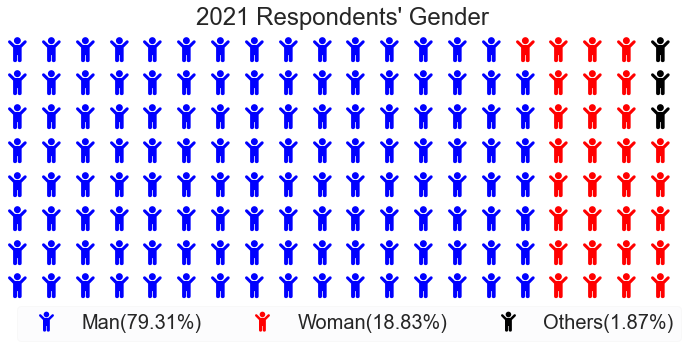

In [525]:
gender = response['Gender'].value_counts()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=8,
    columns=20,
    values=gender,
    colors=("blue", "red", 'black'),
    title={'label': "2021 Respondents' Gender", 
           'loc': 'center',
          'fontdict': {
            'fontsize': 24
            }
          },
    legend={'labels': ["{}({:.2%})".format(a, b) for a, b in zip(gender.index, gender/len(response)) ],
            'loc': 'upper left',
            'bbox_to_anchor': (0, 0),
            'ncol': len(gender),
            'framealpha': 0.1,
            'fontsize': 20},

    font_size=25, 
    icons = 'child',
    icon_style = 'solid',
    figsize=(12, 5),  
    icon_legend=True
)

In [526]:
# Gender Crosstab
gender = pd.crosstab(response['Gender'], response['professional'])
gender

professional,Non-professional,Professional
Gender,,
Man,10418,10180
Others,250,235
Woman,2826,2064


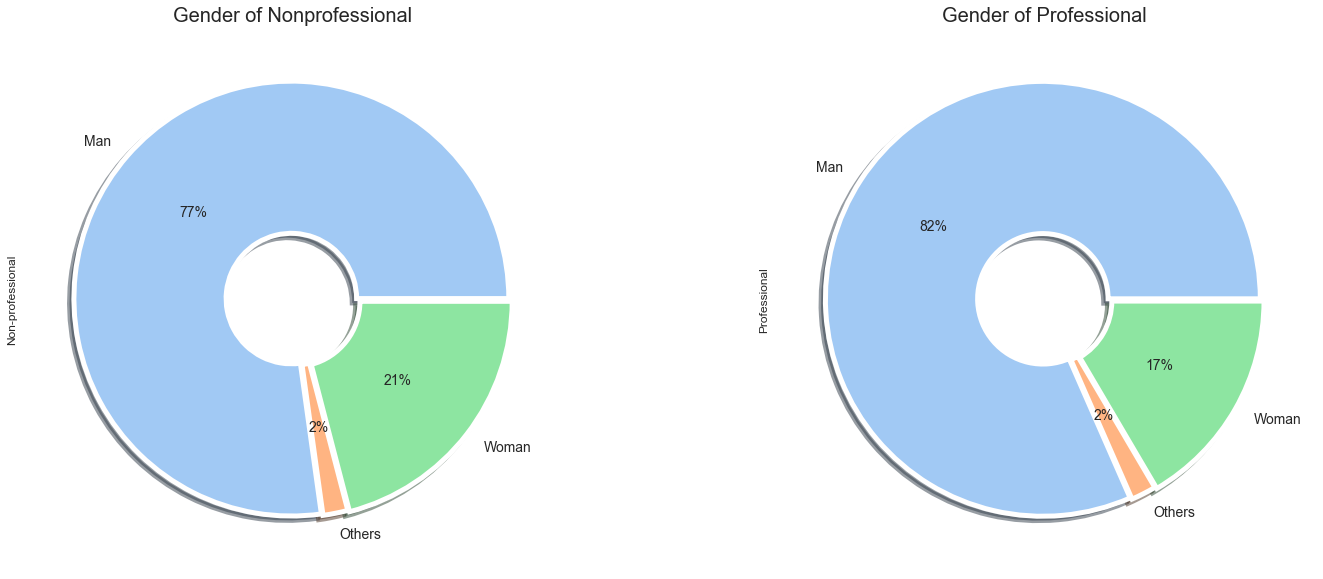

In [527]:
fig, ax = plt.subplots(1, 2, figsize=(22, 10))
explode = [0.01, 0, 0.01]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# Non-professional
gender['Non-professional'].plot.pie(autopct='%.0f%%', colors=sns.color_palette('pastel'), 
                                    explode=explode, wedgeprops=wedgeprops, 
                                    textprops={'fontsize': 14}, ax=ax[0], shadow = True)
# Professional
gender['Professional'].plot.pie(autopct='%.0f%%', colors=sns.color_palette('pastel'), 
                                explode=explode, wedgeprops=wedgeprops, 
                                textprops={'fontsize': 14}, ax=ax[1], shadow = True)
ax[0].set_title('Gender of Nonprofessional', size=20)
ax[1].set_title('Gender of Professional', size=20)
plt.show()

In general, **79.31% of respondants are men** while only **18.83% are women**. However, the proportion of women who has an interest in data-related job tends to get increased by 4% than the past.



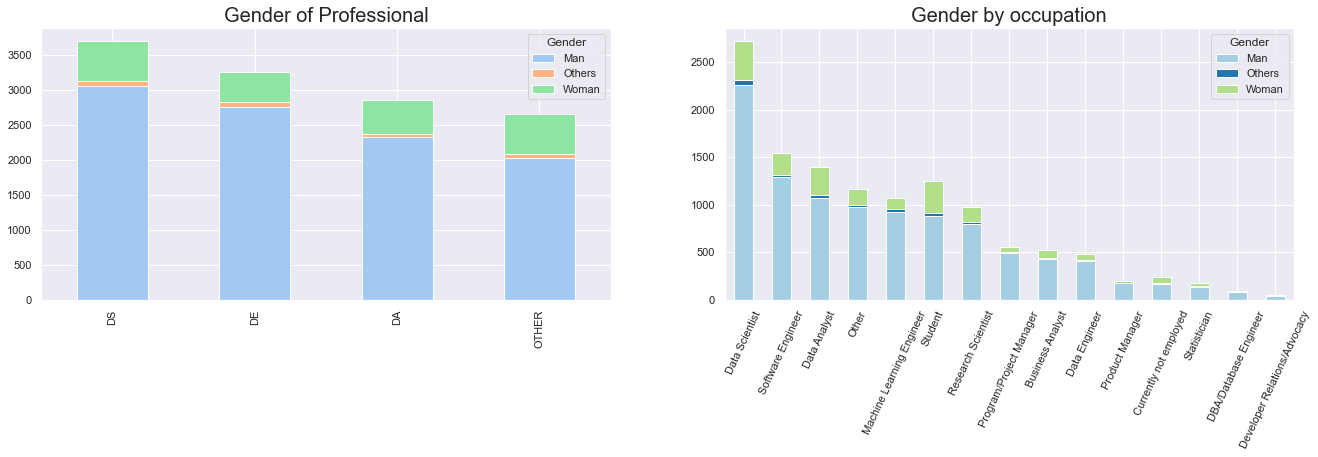

In [545]:
# barplot
fig, ax = plt.subplots(ncols=2, figsize=(20, 5))
gender = pd.crosstab(pro['Gender'], pro['RegroupJobTitle']).T.sort_values(by='Man', ascending=False)
gender.plot.bar(stacked=True, color=sns.color_palette('pastel'), ax=ax[0])

gender_spe = pd.crosstab(pro['Gender'], pro['JobTitle']).T.sort_values(by='Man', ascending=False)
gender_spe.plot.bar(stacked=True, color=sns.color_palette('Paired'), ax=ax[1])

ax[0].set_title('Gender of Professional', size=20)
ax[1].set_title('Gender by occupation', size=20)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

plt.xticks(rotation=65)

plt.show()

The above graph simply shows that which job is preferrable or popular among four categories. 

It turns out that **data scientists** dominates over the others followed by both **software engineer and data analyst**. 


## Q3. Country

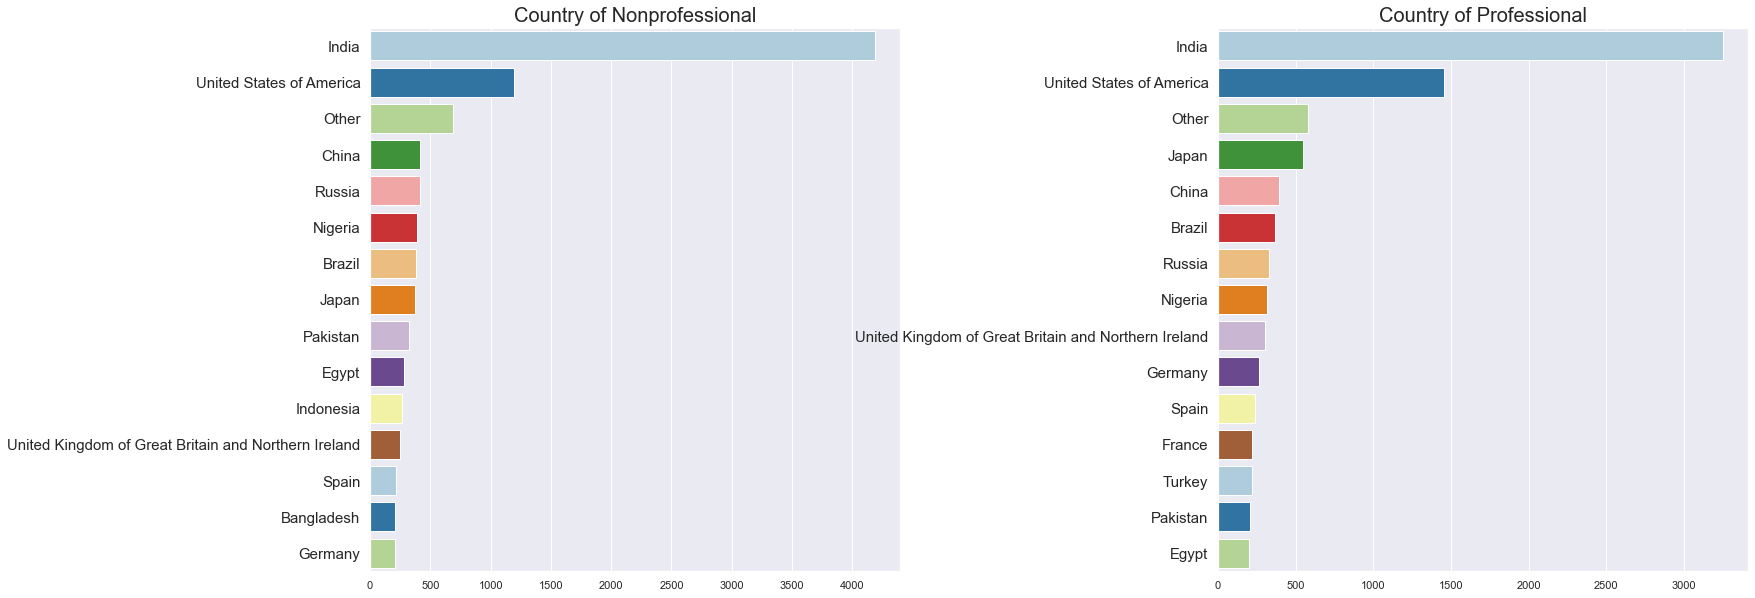

In [529]:
non_country = response[response['professional'] == 'Non-professional']['Country'].value_counts()[:15]
pro_country = response[response['professional'] == 'Professional']['Country'].value_counts()[:15]

fig, ax = plt.subplots(ncols=2, figsize=(22, 10))
sns.barplot(non_country, non_country.index, palette='Paired', ax=ax[0])
sns.barplot(pro_country, pro_country.index, palette='Paired', ax=ax[1])

plt.subplots_adjust(wspace=0.6, hspace=0.5)
ax[0].set_title('Country of Nonprofessional', size=20)
ax[1].set_title('Country of Professional', size=20)
ax[0].set_yticklabels(non_country.index, fontsize=15)
ax[1].set_yticklabels(pro_country.index, fontsize=15)
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.show()

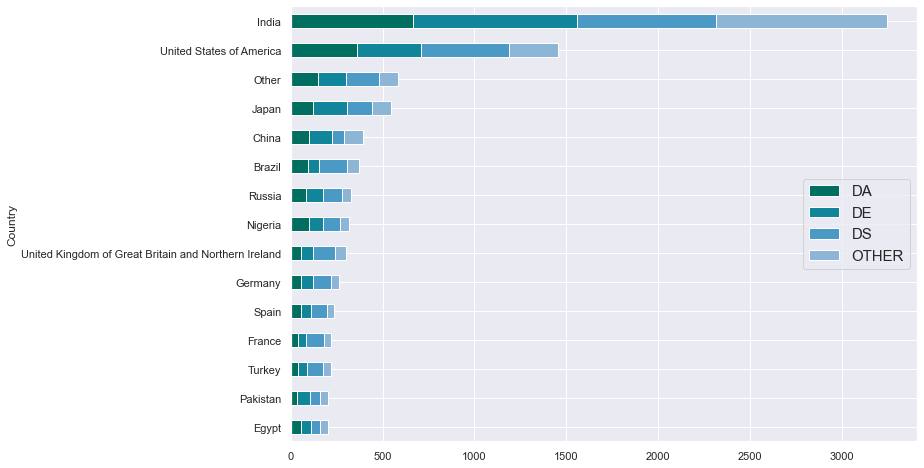

In [544]:
country_spe = pd.crosstab(pro['Country'], pro['RegroupJobTitle'])
country_spe['total'] = country_spe['DA'] + country_spe['DE'] + country_spe['DS'] + country_spe['OTHER']
country_spe = country_spe.sort_values('total', ascending=False)[:15].sort_values('total').drop('total', axis=1)

country_spe.plot.barh(stacked=True, color=sns.color_palette('PuBuGn_r'), figsize=(10, 8))
plt.legend(loc = 'center right', fontsize = 15)
plt.show()

Obviously, most respondants are from either India or US. 

Indonesia and Bangladesh are listed in top 15 by Non-professional respondants where they are not listed in top 15 of professional respondants' country.

As the team members are all Korean, it is unfortunate not to see South Korea in top 15

## Q4. Education

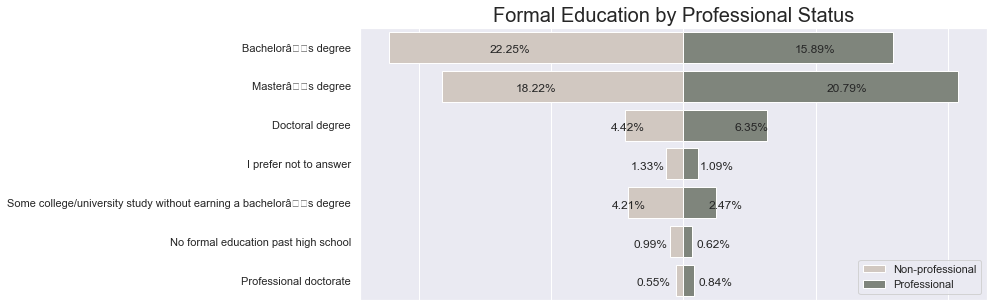

In [531]:
# Data Wrangling: Professional vs Non-professional by Education
total = response['FormalEducation'].value_counts().sum()

## Formal Education by professional as percentage over the entire respondants
### Non-professoinal
nonpro_edu = response[response['professional'] == 'Non-professional']['FormalEducation'].value_counts().to_frame()
nonpro_edu['FormalEducation'] = nonpro_edu['FormalEducation']*(-1) / total
### Professoinal
pro_edu =  response[response['professional'] == 'Professional']['FormalEducation'].value_counts() / total


# Plotting
order = response.FormalEducation.unique()
plt.figure(figsize=(10, 5))

## Non-professional
bar_plot = sns.barplot(y=nonpro_edu.index, x=nonpro_edu['FormalEducation'], order=order, color='#D4C8BE', label = 'Non-professional')
    
## Professional
bar_plot = sns.barplot(y=pro_edu.index, x=pro_edu.values, order=order, color='#7F867B', label = 'Professional')

## Annotation
for rec in bar_plot.patches:
    height = rec.get_width()
    if height < 0:
        height_text = "{:.2%}".format( (-1) * height)
        x_loc = rec.get_x() - .02 + rec.get_width() / 2
    else:
        height_text = "{:.2%}".format(height)
        x_loc = rec.get_x() + .02 + rec.get_width() / 2
    bar_plot.text(x_loc, 
              rec.get_y() + 0.6 + rec.get_x() / 2,
              height_text,
              ha='center', 
              va='bottom') 

## Remove x-axis label
plt.xlabel('')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.legend(loc = 'lower right')
plt.title('Formal Education by Professional Status', fontsize = 20)
plt.show()

- As about 22% of Non-professional has Bachelor's Degree followed by Master's degree, most of Non-professional respondant finish up at least Bachelor's degree. 

- Unlike Non-professional respondants, professionals prefer to complete at least Master's degree

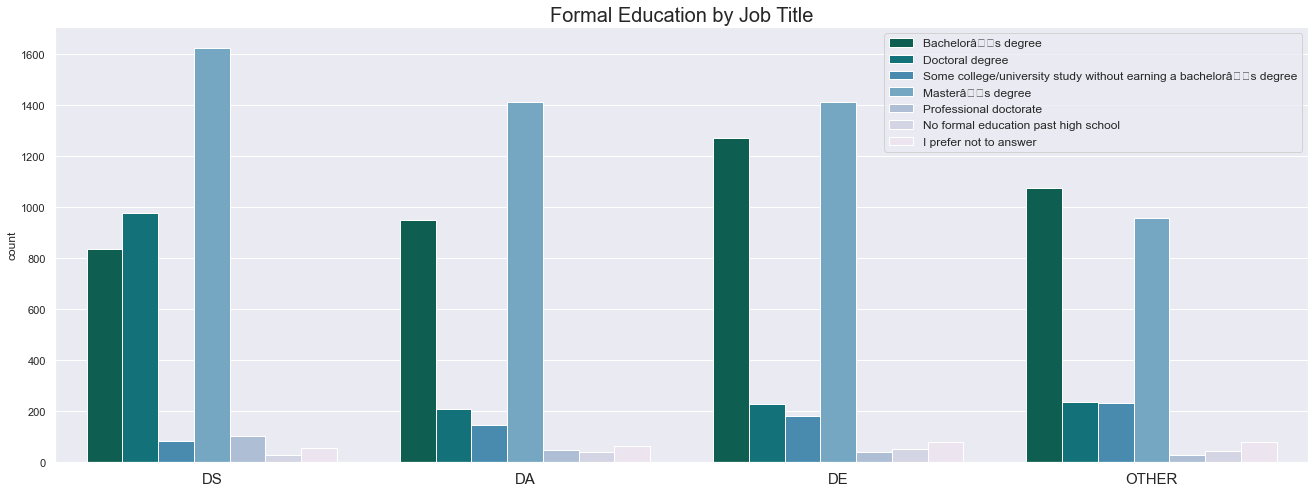

In [533]:
# FormalEducation vs JobTitle
## Plotting
plt.figure(figsize=(20, 8))
sns.countplot(x = 'RegroupJobTitle', hue='FormalEducation', data = pro,
              palette='PuBuGn_r', order=['DS', 'DA', 'DE', 'OTHER'])
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('')
plt.title('Formal Education by Job Title', fontsize =20)
plt.legend(fontsize = 12)
plt.show()

# Q5. Years to Code or Use Programming


'Q6':'YearsToCode', 'Q7':'Language_regular', 'Q8': 'Language_first'

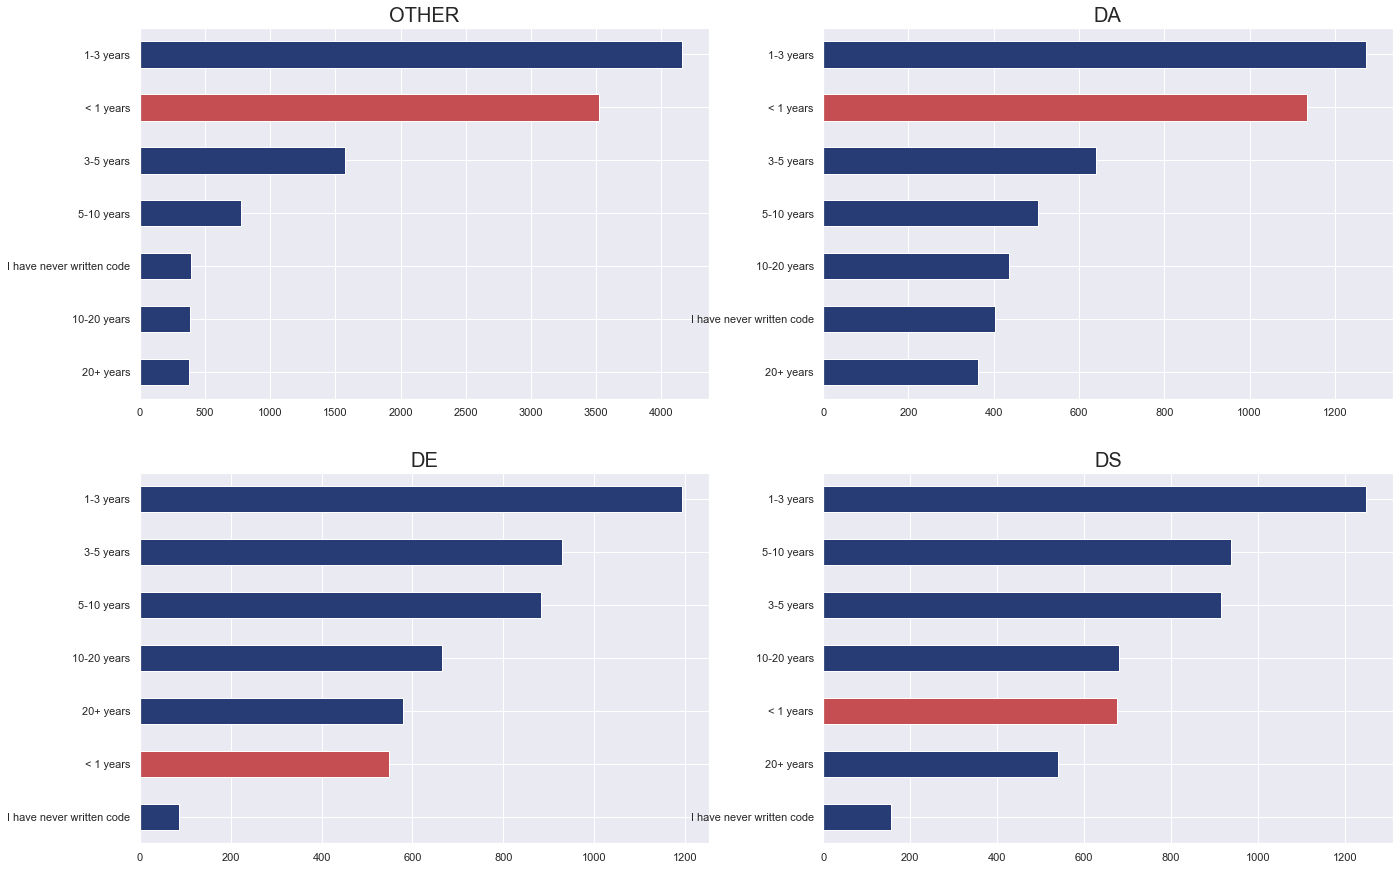

In [534]:
plt.subplots(figsize=(20,15))
job = response['RegroupJobTitle'].unique()
length = len(job)
col_color = {'< 1 years':'r',
             'I have never written code':'#273c75',
             '1-3 years':'#273c75',
             '3-5 years':'#273c75',
             '5-10 years':'#273c75',
             '10-20 years':'#273c75',
             '20+ years':'#273c75'}

for i, j in itertools.zip_longest(job, range(length)):
    plt.subplot((length/2), 2, j+1)
    data = response[response['RegroupJobTitle'] == i]['YearsToCode'].value_counts(ascending=True)
    data.plot(kind='barh', color=pd.DataFrame(data).reset_index()['index'].replace(col_color))
    plt.title(i, size=20)
plt.show()

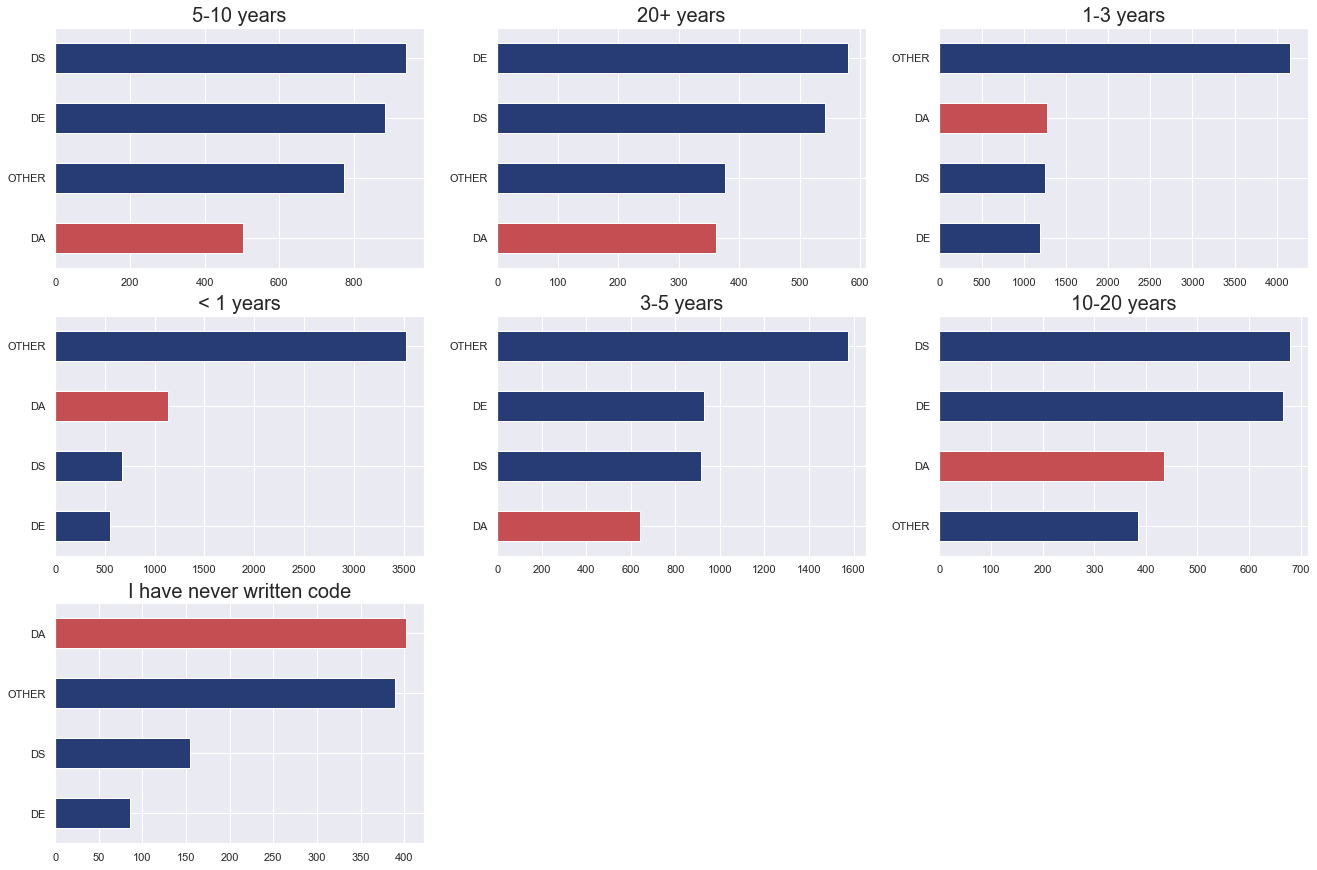

In [535]:
plt.subplots(figsize=(20,15))
exp = response['YearsToCode'].unique()
length = len(exp)
col_color = {'DA':'r',
             'DE':'#273c75',
             'DS':'#273c75',
             'OTHER':'#273c75'}

for i, j in itertools.zip_longest(exp, range(length)):
    plt.subplot((length/2), 3, j+1)
    data = response[response['YearsToCode'] == i]['RegroupJobTitle'].value_counts(ascending=True)
    data.plot(kind='barh', color=pd.DataFrame(data).reset_index()['index'].replace(col_color))
    plt.title(i, size=20)
plt.show()

## Q6. 프로그래밍 사용 언어
- Python
- R
- SQL
- C
- C++
- Java
- Javascript
- Julia
- Swift
- Bash
- MATLAB
- None
- Other



In [538]:
response['Language_regular'] = response['Language_regular'].str.replace('C\++', '\++').str.replace('Javascript', 'JS')
lang = ['Python', 'R', 'SQL', 'C', '\++', 'Java', 'JS', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']

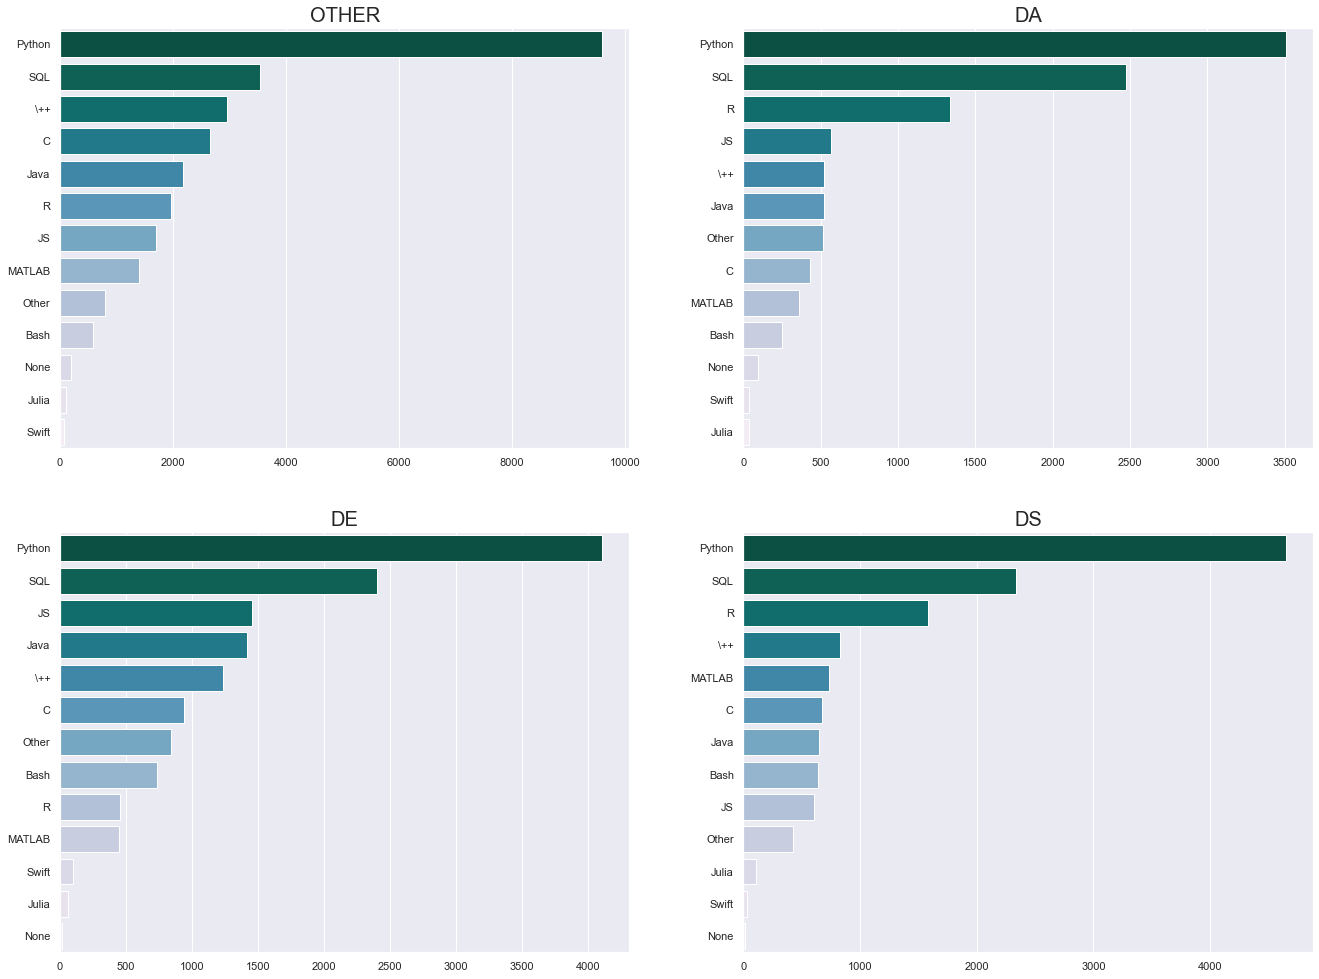

In [539]:
plt.subplots(figsize=(20,17))
job = response['RegroupJobTitle'].unique()
length = len(job)

for i, j in itertools.zip_longest(job, range(length)):
    plt.subplot((length/2), 2, j+1)
    data = response[response['RegroupJobTitle'] == i]  

    lan = []
    cnt = []
    for k in lang:
        lan.append(k)
        cnt.append(len(data[data['Language_regular'].str.contains(k)]))

    df = pd.DataFrame(columns=["language", 'cnt'])
    df['language'] = lan
    df['cnt'] = cnt
    df = df.sort_values(by='cnt', ascending=False)
    sns.barplot(data=df, y='language', x='cnt', palette = 'PuBuGn_r')
    plt.title(i, size=20)
    plt.xlabel('')
    plt.ylabel('')

- **Python and SQL** are the most popular programming language across all job title

- **R** is preferable to both **Data Science and Data Analysis** where statistics is one of necessary skills

- Those who want to be a **Data Engineer** should be familiar with **Java Script, Java and C based language**

## Q9. IDE

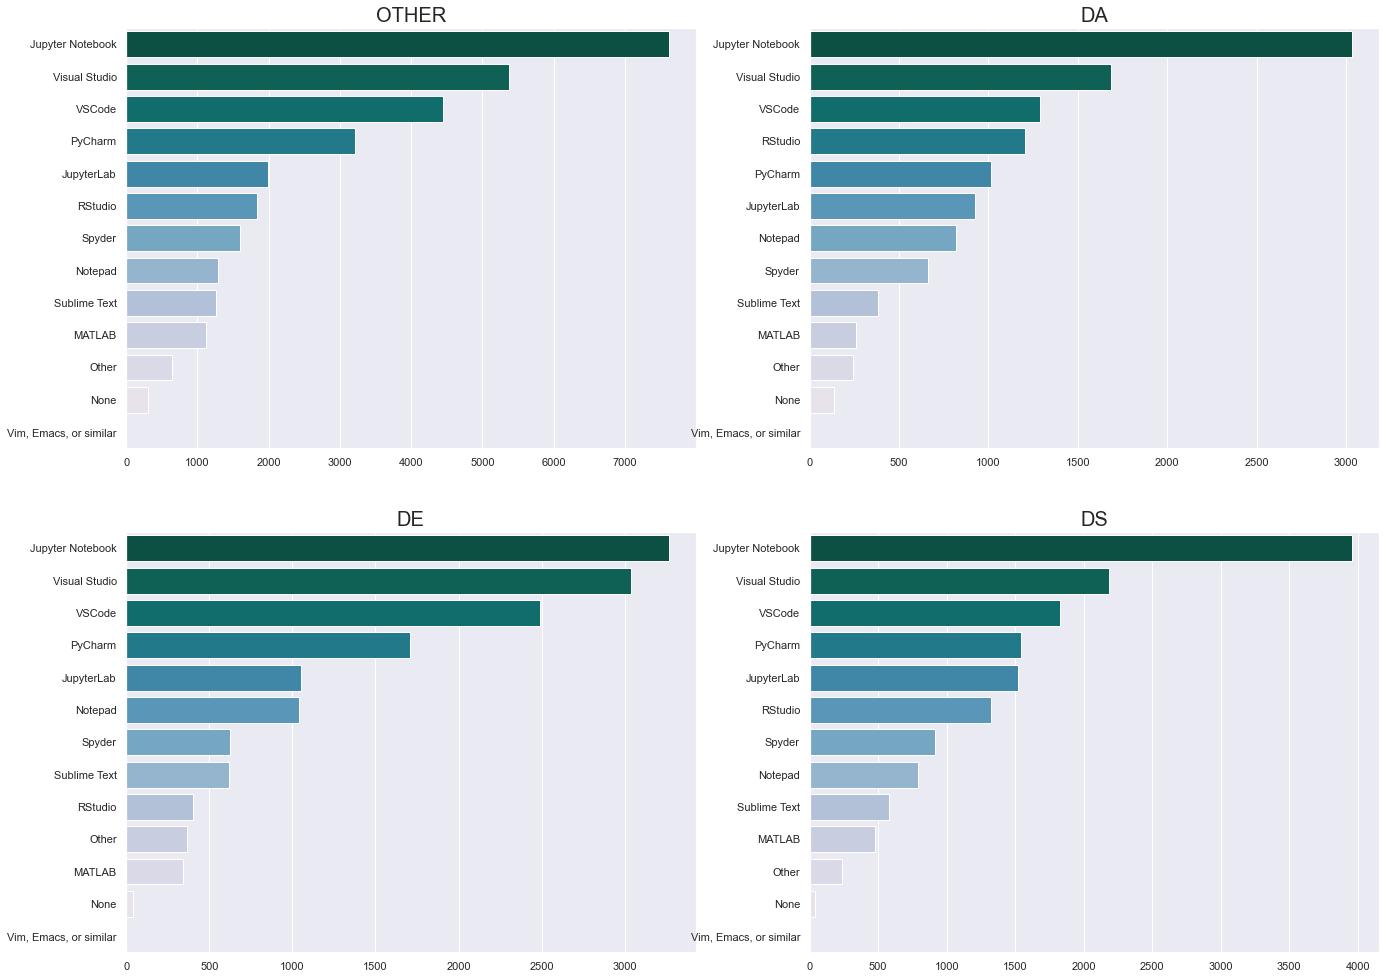

In [541]:
idle = ['JupyterLab', 'RStudio', 'Visual Studio', 'VSCode', 'PyCharm', 'Spyder', 'Notepad',
        'Sublime Text', 'Vim, Emacs, or similar', 'MATLAB', 'Jupyter Notebook', 'None', 'Other']

plt.subplots(figsize=(20,17))
job = response['RegroupJobTitle'].unique()
length = len(job)

for i, j in itertools.zip_longest(job, range(length)):
    plt.subplot((length/2), 2, j+1)
    data = response[response['RegroupJobTitle'] == i]  

    ide = []
    cnt = []
    for k in idle:
        ide.append(k)
        cnt.append(len(data[data['IDE'].str.contains(k)]))

    df = pd.DataFrame(columns=["ide", 'cnt'])
    df['ide'] = ide
    df['cnt'] = cnt
    df = df.sort_values(by='cnt', ascending=False)
    sns.barplot(data=df, y='ide', x='cnt', palette = 'PuBuGn_r')
    plt.title(i, size=20)
    plt.xlabel('')
    plt.ylabel('')

In [587]:
import plotly.express as px
import numpy as np
df = response.groupby(['RegroupJobTitle', 'JobIndustry'])['Age'].count().reset_index()
df = df[df['RegroupJobTitle'] != 'OTHER']
fig = px.treemap(df, path=[px.Constant("world"), 'RegroupJobTitle', 'JobIndustry'], values='Age',
                  color='JobIndustry', title = 'Job Industry by Job Title'
#                  hover_data=['iso_alpha'],
#                   color_continuous_scale='RdBu',
#                   color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop'])
                )
fig.update_traces(textinfo = 'label+percent parent')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

- The most actively applied industries across job titles are **Computers/Technoloy, Academics/Education and Accounting/Finance** 

- Unlike Data Analysis and Data Engineering, **Data Science** seems to focus more on **Academics/Education** than the others

- If you are interested in **Data Science** job, then it would require at least Master's degree since it has something to do with research.



# <center> Work in progress! <br>

## <center> If you like our work or have any questions, <br><br> please leave a comment and give it a like 

## <center> Thanks for your attention